In [1]:
import pandas as pd


# Load data variables

In [2]:
# Load true data
true_data = pd.read_csv("./../processed_VideoCommentsThreatCorpus.csv")
true_data['flags'] = true_data['flags'].apply(lambda x: int(eval(x)[0]))
true_data.rename(columns={"id": "document_id", "flags": "true_label"}, inplace=True)

### Neighbors
neighbors_mistral=pd.read_csv("./../test_results_from_idun/neighbors/neighbor_mistral_final.csv")
neighbors_nemo = pd.read_csv("./../test_results_from_idun/neighbors/neighbor_mistral-nemo_final.csv")
neighbors_small = pd.read_csv("./../test_results_from_idun/neighbors/neighbor-mistral-small-final.csv")
neighbors_q8 = pd.read_csv("./../test_results_from_idun/neighbors/neighbor_qwen3-8-final.csv")
neighbors_q14 = pd.read_csv("./../test_results_from_idun/neighbors/neighbor_qwen3-14-final.csv")
neighbors_g12 = pd.read_csv("./../test_results_from_idun/neighbors/neighbor_gemma3-12b_1.csv")
neighbors_g27 = pd.read_csv("./../test_results_from_idun/neighbors/neighbor_gemma3-27b-final.csv")

agents_mistral = pd.read_csv("./../test_results_from_idun/no_context/no_context_mistral_final.csv")
agents_nemo = pd.read_csv("./../test_results_from_idun/no_context/no_context_mistral-nemo_final.csv")
agents_small = pd.read_csv("./../test_results_from_idun/no_context/no_context_mistral-small_final.csv")
agents_q8 = pd.read_csv("./../test_results_from_idun/no_context/no_context_qwen3-8-final.csv")
agents_q14 = pd.read_csv("./../test_results_from_idun/no_context/no_context_qwen14b-final.csv")
agents_g12 = pd.read_csv("./../test_results_from_idun/no_context/no_context_gemma3-12b_final.csv")
agents_g27 = pd.read_csv("./../test_results_from_idun/no_context/no_context_gemma3-27b-final.csv")

solo_mistral = pd.read_csv("./../test_results_from_idun/solo/solomistral_final.csv")
solo_nemo = pd.read_csv("./../test_results_from_idun/solo/solomistral-nemo_final.csv")
solo_small = pd.read_csv("./../test_results_from_idun/solo/solomistral-small_final.csv")
solo_q8 = pd.read_csv("./../test_results_from_idun/solo/soloqwen3-8b_final.csv")
solo_q14 = pd.read_csv("./../test_results_from_idun/solo/soloqwen3-14b_final.csv")
solo_g12 = pd.read_csv("./../test_results_from_idun/solo/sologemma3-12b-final.csv")
solo_g27 = pd.read_csv("./../test_results_from_idun/solo/sologemma3-27b-final.csv")

context_mistral = pd.read_csv("./../test_results_from_idun/context/context_analysis_mistral_final.csv")
context_nemo = pd.read_csv("./../test_results_from_idun/context/context_analysis_mistral-nemo_final.csv")
context_small = pd.read_csv("./../test_results_from_idun/context/context_analysis_mistral-small_final.csv")
context_q8 = pd.read_csv("./../test_results_from_idun/context/context_analysis_qwen3-8-final.csv")
context_q14 = pd.read_csv("./../test_results_from_idun/context/context_analysis_qwen3-14-final.csv")
context_g12 = pd.read_csv("./../test_results_from_idun/context/context_analysis_gemma3-12b-final.csv")
context_g27 = pd.read_csv("./../test_results_from_idun/context/context_analysis_gemma3-27b-final.csv")


model_dfs_neighbors = [neighbors_mistral, neighbors_nemo, neighbors_q8, neighbors_q14, neighbors_small,neighbors_g12, neighbors_g27]
model_dfs_agents = [agents_mistral, agents_nemo, agents_q8, agents_q14,agents_small,agents_g12, agents_g27]
model_dfs_solo = [solo_mistral, solo_nemo, solo_q8, solo_q14,solo_small,solo_g12,solo_g27]
model_dfs_context = [context_mistral, context_nemo, context_q8, context_q14,context_small,context_g12,context_g27]

## Many variations given by the models :)
intent_mapping = { "no intent of violence": 0, "no intent": 0, "low intent of violence": 1, "low intent": 1, "moderate intent of violence": 2, "moderate intent": 2,"high intent of violence": 3,"high intent": 3}
call_to_action_mapping = { 'no call to action': 0,'low call to action': 1,
    'low call-to-action': 1, 'high call to action': 3, 'moderate call-to-action': 2,' no call-to-action': 0,' no call to action': 0,'low call-to action': 1, 'no call-to-action': 0, 'high call-to-action': 3, ' no call-to action': 0, 'moderate call to action': 2,
    'low call-to-action': 1, ' high call to action': 3, 'moderate call-to action': 2,'no call-to action': 0,'moderate call-to_action': 2,'moderate call': 2,
    'low call': 1,'low call to action': 1,' high call-to-action': 3,'high call': 3,'no call': 0,'low': 1,'no': 0,'low call-to_action': 1, 'No call to action':0, 'low call to action':1, 'low call-to-action':1,
 'moderate call to action':2, 'high call-to-action':3, 'low call to action':1,
 'moderate call-to-action':2, 'high call_to_action':3, 'low call_to_action':1,
 'high call to action':3, 'moderate call_to_action':2, 'no call to action':0,
 'moderate call to action':2, 'no call-to-action':0, 'moderate call-to_action':2,
 'low call-to_action':1, "high call-to_action":3
}

def adjust_labels(pred_df):
    pred_df['violence_label'] = pred_df['violence_label'].apply(lambda x: 0 if x in [0, 1] else 1 if x == 2 else -1)
    # Convert strings to lowercase before mapping
    pred_df["intent_numeric"] = pred_df["intent_label"].str.lower().map(intent_mapping)
    pred_df["call_to_action_numeric"] = pred_df["call_to_action"].str.lower().map(call_to_action_mapping)
    return pred_df
def adjust_labels_solo(pred_df):
    pred_df['violence_label'] = pred_df['violence_label'].apply(lambda x: 0 if x in [0, 1] else 1 if x == 2 else -1)
    return pred_df

# Apply to all and label models
model_names = ["mistral", "nemo", "qwen_8b", "qwen_14b","small","gemma_12b","gemma_27b"]
for i in range(len(model_dfs_neighbors)):
    model_dfs_neighbors[i] = adjust_labels(model_dfs_neighbors[i])
    model_dfs_neighbors[i]["model"] = model_names[i]
    model_dfs_neighbors[i]["pipe"] = "neighbors"

for i in range(len(model_dfs_agents)):
    model_dfs_agents[i] = adjust_labels(model_dfs_agents[i])
    model_dfs_agents[i]["model"] = model_names[i]
    model_dfs_agents[i]["pipe"] = "agents"
    
for i in range(len(model_dfs_context)):
    model_dfs_context[i] = adjust_labels(model_dfs_context[i])
    model_dfs_context[i]["model"] = model_names[i]
    model_dfs_context[i]["pipe"] = "context"

for i in range(len(model_dfs_solo)):
    model_dfs_solo[i] = adjust_labels_solo(model_dfs_solo[i])
    model_dfs_solo[i]["model"] = model_names[i]
    model_dfs_solo[i]["pipe"] = "solo"


combined_for_all = pd.concat(model_dfs_neighbors + model_dfs_agents + model_dfs_solo + model_dfs_context, ignore_index=True)
combined_agents_only = pd.concat(model_dfs_agents + model_dfs_neighbors + model_dfs_context, ignore_index=True)

#Add the true labels
combined_agents_only = combined_agents_only.merge(
    true_data[["document_id", "true_label", "content"]],
    on="document_id",
    how="left"
)

combined_for_all = combined_for_all.merge(
    true_data[["document_id", "true_label", "content"]],
    on="document_id",
    how="left"
)



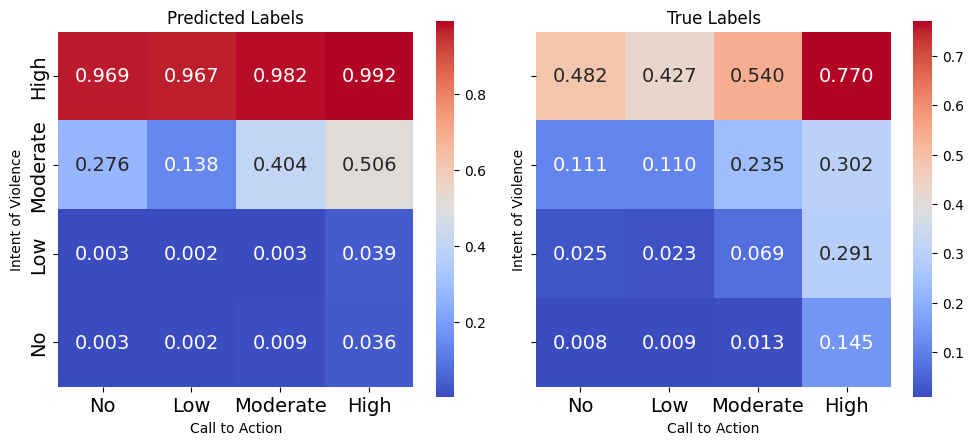

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt

# Group by intent and call-to-action numeric values
heatmap_data_predicted = combined_agents_only.groupby(['intent_numeric', 'call_to_action_numeric'])['violence_label'].mean().unstack()
heatmap_data_true = combined_agents_only.groupby(['intent_numeric', 'call_to_action_numeric'])['true_label'].mean().unstack()


labels = ["No", "Low", "Moderate", "High"]
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Heatmap: Predicted
sns.heatmap(
    heatmap_data_predicted,
    annot=True,
    cmap='coolwarm',
    fmt=".3f",
    ax=axes[0],
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"fontsize": 14}  # Larger font size in cells
)
axes[0].set_title('Predicted Labels')
axes[0].set_xlabel('Call to Action')
axes[0].set_ylabel('Intent of Violence')
axes[0].invert_yaxis()
axes[0].set_xticklabels(labels, fontsize=14)
axes[0].set_yticklabels(labels,fontsize=14)

# Heatmap: True
sns.heatmap(
    heatmap_data_true,
    annot=True,
    cmap='coolwarm',
    fmt=".3f",
    ax=axes[1],
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"fontsize": 14}
)
axes[1].set_title('True Labels')
axes[1].set_xlabel('Call to Action')
axes[1].set_ylabel('Intent of Violence')
axes[1].invert_yaxis()
axes[1].set_xticklabels(labels, fontsize=14)
axes[1].set_yticklabels(labels, fontsize=14)

plt.tight_layout()
plt.show()

In [4]:


# Decode flagged_issues into a proper list
combined_for_all["flagged_issues"] = combined_for_all["flagged_issues"].apply(eval)

# Create binary flags
combined_for_all["has_flag"] = combined_for_all["flagged_issues"].apply(lambda x: len(x) > 0)

# Add correctness column
combined_for_all["is_correct"] = combined_for_all["violence_label"] == combined_for_all["true_label"]


# Decode flagged_issues into a proper list
combined_agents_only["flagged_issues"] = combined_agents_only["flagged_issues"].apply(eval)

# Create binary flags
combined_agents_only["has_flag"] = combined_agents_only["flagged_issues"].apply(lambda x: len(x) > 0)

# Add correctness column
combined_agents_only["is_correct"] = combined_agents_only["violence_label"] == combined_agents_only["true_label"]

In [5]:
flagged_perf = combined_for_all.groupby("has_flag")["is_correct"].mean()
print("Accuracy With and Without Flags:")
print(flagged_perf)


Accuracy With and Without Flags:
has_flag
False    0.827291
True     0.835784
Name: is_correct, dtype: float64


         count    percent  accuracy
flag                               
0     110220.0  40.877937  0.824288
1      32938.0  12.215909  0.947659
2       1146.0   0.425024  0.850785
3      10011.0   3.712838  0.593447
4        170.0   0.063049  0.788235


<Figure size 600x600 with 0 Axes>

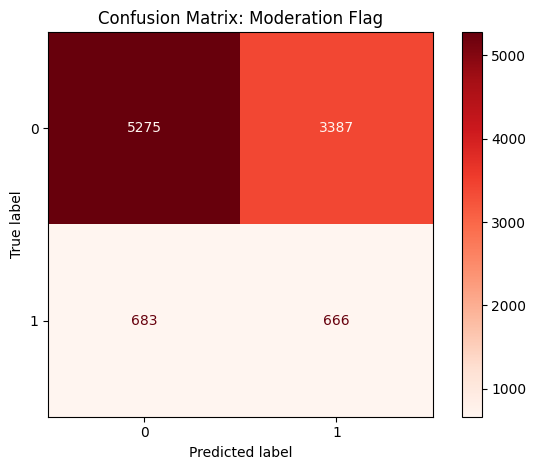

In [6]:
# Remap solo pipeline's 1 → 3 (moderation alignment)
from collections import defaultdict


def remap_flags(row):
    if row["pipe"] == "solo":
        return [3 if f == 1 else f for f in row["flagged_issues"]]
    return row["flagged_issues"]

new_df = combined_for_all.copy()

new_df["remapped_flags"] = new_df.apply(remap_flags, axis=1)

# Count flag frequencies and correct predictions
flag_stats = defaultdict(lambda: {"count": 0, "correct": 0})

for _, row in new_df.iterrows():
    for flag in row["remapped_flags"]:
        flag_stats[flag]["count"] += 1
        if row["is_correct"]:
            flag_stats[flag]["correct"] += 1

# Build DataFrame
flag_stats_df = pd.DataFrame({
    flag: {
        "count": stats["count"],
        "percent": stats["count"] / len(combined_for_all) * 100,
        "accuracy": stats["correct"] / stats["count"] if stats["count"] else 0
    }
    for flag, stats in flag_stats.items()
}).T.sort_index()

# Format clean table
flag_stats_df.index.name = "flag"
flag_stats_df = flag_stats_df[["count", "percent", "accuracy"]]

# Display it
print(flag_stats_df)


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


insecure_rows = new_df[
    new_df['remapped_flags'].apply(lambda x: 3 in x)
]

# Step 5: Generate and display confusion matrix
cm = confusion_matrix(insecure_rows["true_label"], insecure_rows["violence_label"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Reds', values_format='d')
plt.title("Confusion Matrix: Moderation Flag")
plt.tight_layout()
plt.show()



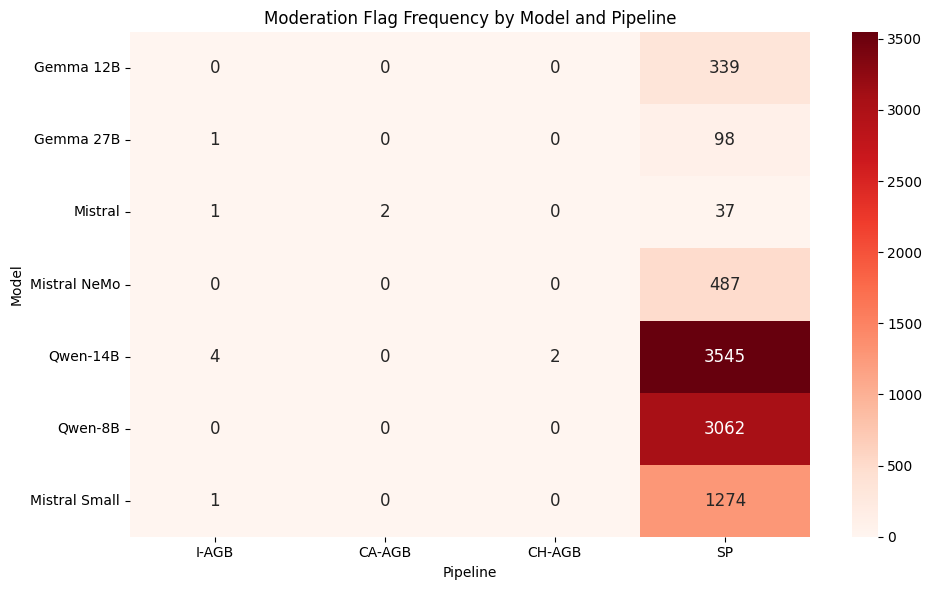

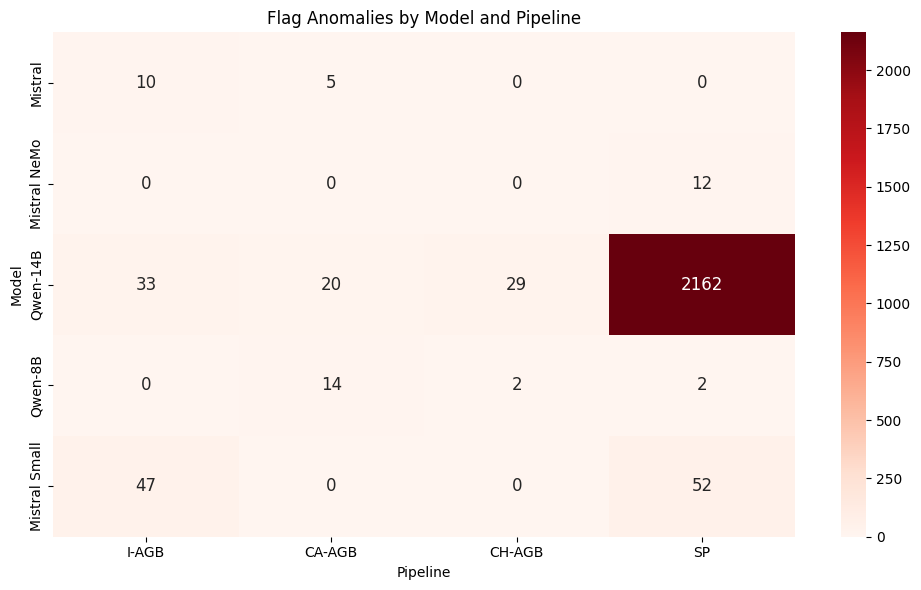

In [7]:



# moderations = combined_for_all[combined_for_all["flagged_issues"].apply(lambda flags: 3 in flags)]


# # Create a frequency table of model-pipeline combinations
# model_pipe_matrix = moderations.groupby(['model', 'pipe']).size().unstack(fill_value=0)

# # Plot as heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(model_pipe_matrix, annot=True, cmap="Reds", fmt="d")
# plt.title("Moderation Flag (3) Frequency by Model and Pipeline")
# plt.xlabel("Pipeline")
# plt.ylabel("Model")
# plt.tight_layout()
# plt.show()

def is_moderation_flag(row):
    if row["pipe"] == "solo":
        return 1 in row["flagged_issues"]
    else:
        return 3 in row["flagged_issues"]

# Apply the filter
moderations = combined_for_all[combined_for_all.apply(is_moderation_flag, axis=1)]

# Create a frequency table of model-pipeline combinations
model_pipe_matrix = moderations.groupby(['model', 'pipe']).size().unstack(fill_value=0)
anomalies = combined_for_all[
    combined_for_all.apply(
        lambda row: 
        any(f not in ["",0, 1] for f in row["flagged_issues"])
        if row["pipe"] == "solo"
        else any(f not in ["",0, 1, 2, 3] for f in row["flagged_issues"]),
        axis=1
    )
]
# Create a frequency table of model-pipeline combinations
anomaly_matrix = anomalies.groupby(['model', 'pipe']).size().unstack(fill_value=0)

# Pretty label maps
model_name_map = {
    "mistral": "Mistral",
    "nemo": "Mistral NeMo",
    "small": "Mistral Small",
    "qwen_8b": "Qwen-8B",
    "qwen_14b": "Qwen-14B",
    "gemma_12b": "Gemma 12B",
    "gemma_27b": "Gemma 27B"
}
pipe_name_map = {
    "agents": "I-AGB",
    "context": "CA-AGB",
    "neighbors": "CH-AGB",
    "solo": "SP"
}

# Apply renaming
mod_matrix = model_pipe_matrix.rename(index=model_name_map, columns=pipe_name_map)
anom_matrix = anomaly_matrix.rename(index=model_name_map, columns=pipe_name_map)

# --- First Heatmap: Moderation Flag Frequency ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    mod_matrix,
    annot=True,
    fmt="d",
    cmap="Reds",
    annot_kws={"fontsize": 12}
)
plt.title("Moderation Flag Frequency by Model and Pipeline")
plt.xlabel("Pipeline")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# --- Second Heatmap: Anomaly Frequency ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    anom_matrix,
    annot=True,
    fmt="d",
    cmap="Reds",
    annot_kws={"fontsize": 12}
)
plt.title("Flag Anomalies by Model and Pipeline")
plt.xlabel("Pipeline")
plt.ylabel("Model")
plt.tight_layout()
plt.show()



<Figure size 600x600 with 0 Axes>

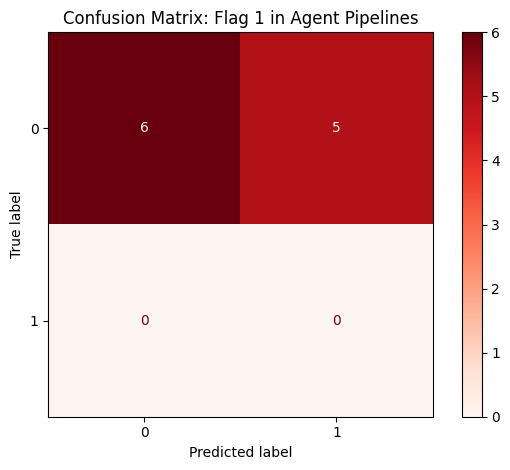

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


insecure_rows = combined_agents_only[
    combined_agents_only['flagged_issues'].apply(lambda x: 3 in x)
]

# Step 5: Generate and display confusion matrix
cm = confusion_matrix(insecure_rows["true_label"], insecure_rows["violence_label"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Reds', values_format='d')
plt.title("Confusion Matrix: Flag 1 in Agent Pipelines")
plt.tight_layout()
plt.show()



       model  total_instances  accuracy  true_positives  false_positives  \
1  gemma_27b            38516  0.880595            2715             2234   
6      small            38520  0.880426            2596             2153   
4   qwen_14b            38520  0.823416            3501             5254   
3       nemo            38520  0.822222            3451             5250   
5    qwen_8b            38520  0.817913            3183             5148   
0  gemma_12b            38516  0.802342            3452             5985   
2    mistral            38520  0.798183            3179             5904   

   false_negatives  precision    recall  f1_score  
1             2365   0.548596  0.534449  0.541430  
6             2453   0.546641  0.514161  0.529904  
4             1548   0.399886  0.693405  0.507244  
3             1598   0.396621  0.683502  0.501964  
5             1866   0.382067  0.630422  0.475785  
0             1628   0.365794  0.679528  0.475580  
2             1870   0.3499

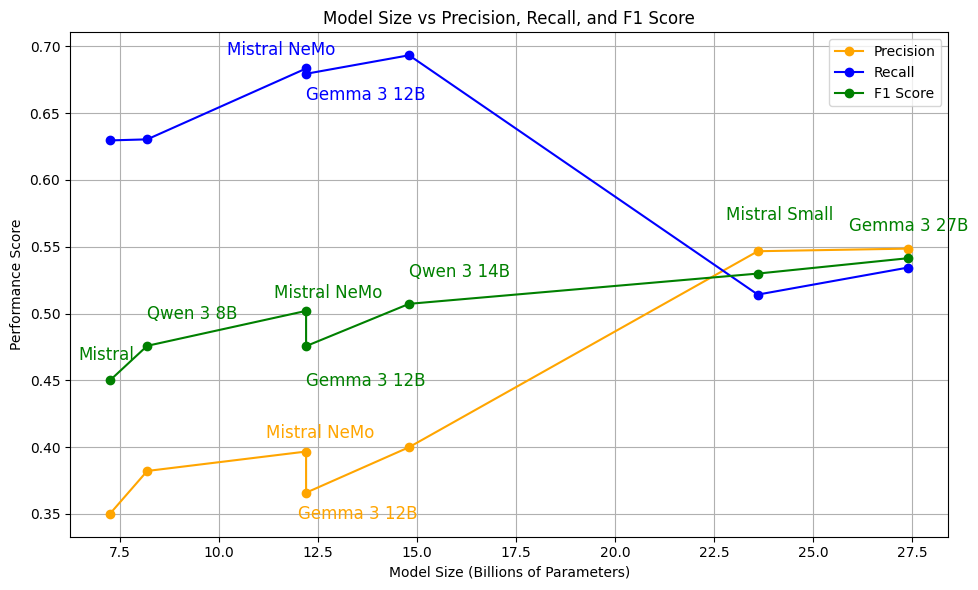

In [9]:
# Group by model only (across all pipelines)
model_performance = (
    combined_for_all
    .groupby("model")
    .agg(
        total_instances=("violence_label", "count"),
        accuracy=("is_correct", "mean"),
        true_positives=("violence_label", lambda x: ((x == 1) & (combined_for_all.loc[x.index, "true_label"] == 1)).sum()),
        false_positives=("violence_label", lambda x: ((x == 1) & (combined_for_all.loc[x.index, "true_label"] == 0)).sum()),
        false_negatives=("violence_label", lambda x: ((x == 0) & (combined_for_all.loc[x.index, "true_label"] == 1)).sum())
    )
    .reset_index()
)

# Compute precision, recall, F1
model_performance["precision"] = model_performance["true_positives"] / (model_performance["true_positives"] + model_performance["false_positives"])
model_performance["recall"] = model_performance["true_positives"] / (model_performance["true_positives"] + model_performance["false_negatives"])
model_performance["f1_score"] = 2 * (model_performance["precision"] * model_performance["recall"]) / (model_performance["precision"] + model_performance["recall"])

# Replace NaNs with 0
model_performance = model_performance.fillna(0)

# Display sorted by F1-score
print(model_performance.sort_values("f1_score", ascending=False))

import matplotlib.pyplot as plt

# Define model sizes (in billions of parameters)
model_sizes = {
    "mistral": 7.25,
    "nemo": 12.2,
    "small": 23.6,
    "qwen_8b": 8.19,
    "qwen_14b": 14.8,
    "gemma_12b": 12.2,
    "gemma_27b": 27.4
}

# Prettify model names
pretty_names = {
    "mistral": "Mistral",
    "nemo": "Mistral NeMo",
    "small": "Mistral Small",
    "qwen_8b": "Qwen 3 8B",
    "qwen_14b": "Qwen 3 14B",
    "gemma_12b": "Gemma 3 12B",
    "gemma_27b": "Gemma 3 27B"

}

# Add to DataFrame
model_performance["size"] = model_performance["model"].map(model_sizes)
model_performance["pretty_name"] = model_performance["model"].map(pretty_names)
model_performance = model_performance.sort_values("size")

plt.figure(figsize=(10, 6))

plt.plot(model_performance["size"], model_performance["precision"], marker='o', label="Precision", color="orange")
plt.plot(model_performance["size"], model_performance["recall"], marker='o', label="Recall", color="blue")
plt.plot(model_performance["size"], model_performance["f1_score"], marker='o', label="F1 Score", color="green")

for _, row in model_performance.iterrows():
    model = row["model"]
    if model == "nemo":
        plt.text(row["size"]-1, row["precision"] + 0.01, row["pretty_name"], fontsize=12, color="orange")
        plt.text(row["size"]-2, row["recall"] + 0.01, row["pretty_name"], fontsize=12, color="blue")
        plt.text(row["size"] - 0.8, row["f1_score"] + 0.01, row["pretty_name"], fontsize=12, color="green")
    elif model == "gemma_12b":
        plt.text(row["size"] -0.2, row["precision"] - 0.02, row["pretty_name"], fontsize=12, color="orange")
        plt.text(row["size"], row["recall"] - 0.02, row["pretty_name"], fontsize=12, color="blue")
        plt.text(row["size"], row["f1_score"] - 0.03, row["pretty_name"], fontsize=12, color="green")
    elif model == "mistral":
        plt.text(row["size"] - 0.8, row["f1_score"] + 0.015, row["pretty_name"], fontsize=12, color="green")
    elif model == "small":
        plt.text(row["size"]-0.8, row["f1_score"] + 0.04, row["pretty_name"], fontsize=12, color="green")
    elif model == "gemma_27b":
        plt.text(row["size"]-1.5, row["f1_score"] + 0.02, row["pretty_name"], fontsize=12, color="green")
    elif model == "qwen_8b":
        plt.text(row["size"], row["f1_score"]+0.02, row["pretty_name"], fontsize=12, color="green")
    elif model == "qwen_14b":
        plt.text(row["size"], row["f1_score"] + 0.02, row["pretty_name"], fontsize=12, color="green")

plt.xlabel("Model Size (Billions of Parameters)")
plt.ylabel("Performance Score")
plt.title("Model Size vs Precision, Recall, and F1 Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [10]:
# Group by pipeline only
pipeline_performance = (
    combined_for_all
    .groupby("pipe")
    .agg(
        total_instances=("violence_label", "count"),
        accuracy=("is_correct", "mean"),
        true_positives=("violence_label", lambda x: ((x == 1) & (combined_for_all.loc[x.index, "true_label"] == 1)).sum()),
        false_positives=("violence_label", lambda x: ((x == 1) & (combined_for_all.loc[x.index, "true_label"] == 0)).sum()),
        false_negatives=("violence_label", lambda x: ((x == 0) & (combined_for_all.loc[x.index, "true_label"] == 1)).sum())
    )
    .reset_index()
)

# Compute precision, recall, F1
pipeline_performance["precision"] = pipeline_performance["true_positives"] / (pipeline_performance["true_positives"] + pipeline_performance["false_positives"])
pipeline_performance["recall"] = pipeline_performance["true_positives"] / (pipeline_performance["true_positives"] + pipeline_performance["false_negatives"])
pipeline_performance["f1_score"] = 2 * (pipeline_performance["precision"] * pipeline_performance["recall"]) / (pipeline_performance["precision"] + pipeline_performance["recall"])

# Clean up
pipeline_performance = pipeline_performance.fillna(0)

# Show table
print(pipeline_performance.sort_values("f1_score", ascending=False))

        pipe  total_instances  accuracy  true_positives  false_positives  \
0     agents            67408  0.880074            6424             5690   
2  neighbors            67408  0.866218            6619             6819   
1    context            67408  0.841235            7166             9050   
3       solo            67408  0.741099            1868            10369   

   false_negatives  precision    recall  f1_score  
0             2394   0.530296  0.728510  0.613797  
2             2199   0.492558  0.750624  0.594806  
1             1652   0.441909  0.812656  0.572501  
3             7083   0.152652  0.208692  0.176326  


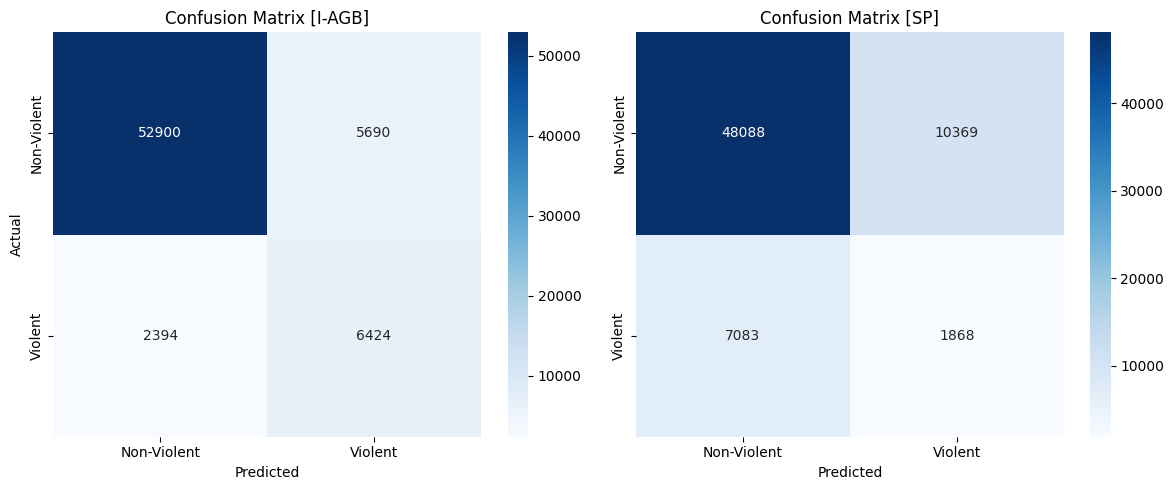

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Filter by pipeline
agents = combined_for_all[combined_for_all["pipe"] == "agents"]
solo = combined_for_all[combined_for_all["pipe"] == "solo"]

# Compute confusion matrices
cm_agents = confusion_matrix(agents["true_label"], agents["violence_label"])
cm_solo = confusion_matrix(solo["true_label"], solo["violence_label"])

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Agents
sns.heatmap(cm_agents, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Violent', 'Violent'],
            yticklabels=['Non-Violent', 'Violent'],
            ax=axes[0])
axes[0].set_title('Confusion Matrix [I-AGB]')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Solo
sns.heatmap(cm_solo, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Violent', 'Violent'],
            yticklabels=['Non-Violent', 'Violent'],
            ax=axes[1])
axes[1].set_title('Confusion Matrix [SP]')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [12]:
# Group by model only (across AGENTS)
model_performance = (
    combined_agents_only
    .groupby("model")
    .agg(
        total_instances=("violence_label", "count"),
        accuracy=("is_correct", "mean"),
        true_positives=("violence_label", lambda x: ((x == 1) & (combined_agents_only.loc[x.index, "true_label"] == 1)).sum()),
        false_positives=("violence_label", lambda x: ((x == 1) & (combined_agents_only.loc[x.index, "true_label"] == 0)).sum()),
        false_negatives=("violence_label", lambda x: ((x == 0) & (combined_agents_only.loc[x.index, "true_label"] == 1)).sum())
    )
    .reset_index()
)

# Compute precision, recall, F1
model_performance["precision"] = model_performance["true_positives"] / (model_performance["true_positives"] + model_performance["false_positives"])
model_performance["recall"] = model_performance["true_positives"] / (model_performance["true_positives"] + model_performance["false_negatives"])
model_performance["f1_score"] = 2 * (model_performance["precision"] * model_performance["recall"]) / (model_performance["precision"] + model_performance["recall"])

# Replace NaNs with 0
model_performance = model_performance.fillna(0)

# Display sorted by F1-score
print(model_performance.sort_values("f1_score", ascending=False))

       model  total_instances  accuracy  true_positives  false_positives  \
6      small            28890  0.911042            2447             1237   
1  gemma_27b            28887  0.905598            2574             1524   
4   qwen_14b            28890  0.859467            3191             3471   
5    qwen_8b            28890  0.878989            2690             2406   
3       nemo            28890  0.839772            3236             4085   
0  gemma_12b            28887  0.815419            3225             4780   
2    mistral            28890  0.827276            2846             4056   

   false_negatives  precision    recall  f1_score  
6             1333   0.664224  0.647354  0.655681  
1             1203   0.628111  0.681493  0.653714  
4              589   0.478985  0.844180  0.611186  
5             1090   0.527865  0.711640  0.606129  
3              544   0.442016  0.856085  0.583011  
0              552   0.402873  0.853852  0.547445  
2              934   0.4123

In [13]:
model_performance = (
    combined_for_all
    .groupby("model")
    .agg(
        total_instances=("violence_label", "count"),
        accuracy=("is_correct", "mean"),
        true_positives=("violence_label", lambda x: ((x == 1) & (combined_for_all.loc[x.index, "true_label"] == 1)).sum()),
        false_positives=("violence_label", lambda x: ((x == 1) & (combined_for_all.loc[x.index, "true_label"] == 0)).sum()),
        false_negatives=("violence_label", lambda x: ((x == 0) & (combined_for_all.loc[x.index, "true_label"] == 1)).sum())
    )
    .reset_index()
)

# Compute precision, recall, F1
model_performance["precision"] = model_performance["true_positives"] / (model_performance["true_positives"] + model_performance["false_positives"])
model_performance["recall"] = model_performance["true_positives"] / (model_performance["true_positives"] + model_performance["false_negatives"])
model_performance["f1_score"] = 2 * (model_performance["precision"] * model_performance["recall"]) / (model_performance["precision"] + model_performance["recall"])

# Replace NaNs with 0
model_performance = model_performance.fillna(0)

# Display sorted by F1-score
print(model_performance.sort_values("f1_score", ascending=False))

       model  total_instances  accuracy  true_positives  false_positives  \
1  gemma_27b            38516  0.880595            2715             2234   
6      small            38520  0.880426            2596             2153   
4   qwen_14b            38520  0.823416            3501             5254   
3       nemo            38520  0.822222            3451             5250   
5    qwen_8b            38520  0.817913            3183             5148   
0  gemma_12b            38516  0.802342            3452             5985   
2    mistral            38520  0.798183            3179             5904   

   false_negatives  precision    recall  f1_score  
1             2365   0.548596  0.534449  0.541430  
6             2453   0.546641  0.514161  0.529904  
4             1548   0.399886  0.693405  0.507244  
3             1598   0.396621  0.683502  0.501964  
5             1866   0.382067  0.630422  0.475785  
0             1628   0.365794  0.679528  0.475580  
2             1870   0.3499

        pipe  total_instances  accuracy  true_positives  false_positives  \
0     agents            67408  0.880074            6424             5690   
2  neighbors            67408  0.866218            6619             6819   
1    context            67408  0.841235            7166             9050   

   false_negatives  precision    recall  f1_score  
0             2394   0.530296  0.728510  0.613797  
2             2199   0.492558  0.750624  0.594806  
1             1652   0.441909  0.812656  0.572501  


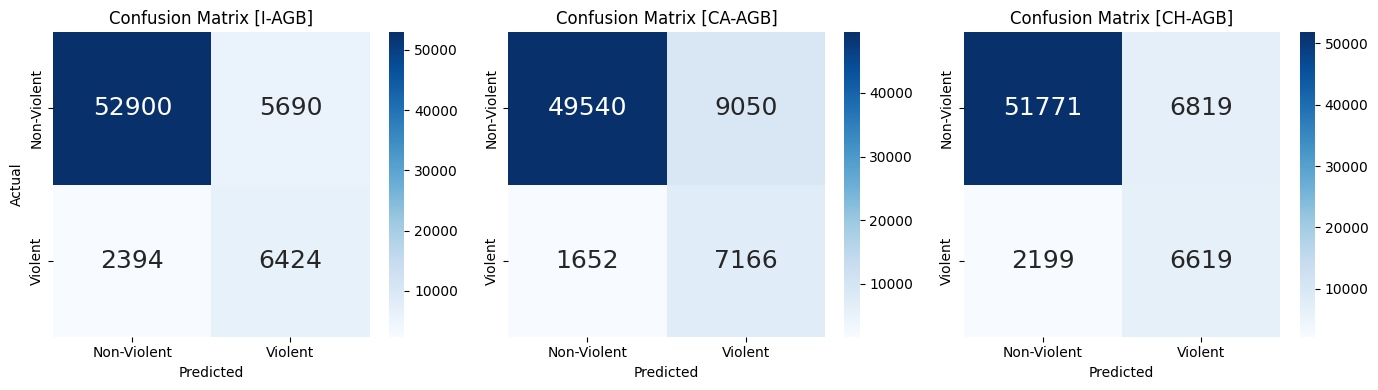

In [14]:
# Group by pipeline only
pipeline_performance = (
    combined_agents_only
    .groupby("pipe")
    .agg(
        total_instances=("violence_label", "count"),
        accuracy=("is_correct", "mean"),
        true_positives=("violence_label", lambda x: ((x == 1) & (combined_agents_only.loc[x.index, "true_label"] == 1)).sum()),
        false_positives=("violence_label", lambda x: ((x == 1) & (combined_agents_only.loc[x.index, "true_label"] == 0)).sum()),
        false_negatives=("violence_label", lambda x: ((x == 0) & (combined_agents_only.loc[x.index, "true_label"] == 1)).sum())
    )
    .reset_index()
)

# Compute precision, recall, F1
pipeline_performance["precision"] = pipeline_performance["true_positives"] / (pipeline_performance["true_positives"] + pipeline_performance["false_positives"])
pipeline_performance["recall"] = pipeline_performance["true_positives"] / (pipeline_performance["true_positives"] + pipeline_performance["false_negatives"])
pipeline_performance["f1_score"] = 2 * (pipeline_performance["precision"] * pipeline_performance["recall"]) / (pipeline_performance["precision"] + pipeline_performance["recall"])

# Clean up
pipeline_performance = pipeline_performance.fillna(0)

# Show table
print(pipeline_performance.sort_values("f1_score", ascending=False))

# Filter by pipeline
agents = combined_for_all[combined_for_all["pipe"] == "agents"]
context = combined_for_all[combined_for_all["pipe"] == "context"]
neighbors = combined_for_all[combined_for_all["pipe"] == "neighbors"]

# Compute confusion matrices
cm_agents = confusion_matrix(agents["true_label"], agents["violence_label"])
cm_context = confusion_matrix(context["true_label"], context["violence_label"])
cm_neighbors = confusion_matrix(neighbors["true_label"], neighbors["violence_label"])

# Plot side-by-side
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Agents
sns.heatmap(cm_agents, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Violent', 'Violent'],
            yticklabels=['Non-Violent', 'Violent'],
            annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Confusion Matrix [I-AGB]')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Solo
sns.heatmap(cm_context, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Violent', 'Violent'],
            yticklabels=['Non-Violent', 'Violent'],
            annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Confusion Matrix [CA-AGB]')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('')

sns.heatmap(cm_neighbors, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Violent', 'Violent'],
            yticklabels=['Non-Violent', 'Violent'],
          annot_kws={"size": 18}, ax=axes[2])
axes[2].set_title('Confusion Matrix [CH-AGB]')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()




In [15]:
import pandas as pd

# Pair all models
agent_neighbor_pairs = {
    "mistral": (agents_mistral, neighbors_mistral),
    "nemo": (agents_nemo, neighbors_nemo),
    "small": (agents_small, neighbors_small),
    "q8": (agents_q8, neighbors_q8),
    "q14": (agents_q14, neighbors_q14),
    "g12": (agents_g12, neighbors_g12),
    "g27": (agents_g27, neighbors_g27)
}

def count_ones(lst):
    return sum(1 for x in lst if x == 1)

results_summary = []

for model_name, (agent_data, neighbors_data) in agent_neighbor_pairs.items():
    mismatch_count = 0
    violent_instances = 0

    for i in range(1, len(agent_data) - 1):  # Skip edges
        try:
            agent_before = agent_data.iloc[i - 1]
            agent_current = agent_data.iloc[i]
            agent_after = agent_data.iloc[i + 1]

            neighbors_before = neighbors_data.iloc[i - 1]
            neighbors_current = neighbors_data.iloc[i]
            neighbors_after = neighbors_data.iloc[i + 1]

            # Skip if any violence_label is NaN
            if any(pd.isna(x['violence_label']) for x in [agent_before, agent_current, agent_after,
                                                           neighbors_before, neighbors_current, neighbors_after]):
                continue

            if agent_current['violence_label'] == 1:
                violent_instances += 1

                agent_pattern = [
                    int(agent_before['violence_label']),
                    int(agent_current['violence_label']),
                    int(agent_after['violence_label'])
                ]
                neighbors_pattern = [
                    int(neighbors_before['violence_label']),
                    int(neighbors_current['violence_label']),
                    int(neighbors_after['violence_label'])
                ]

                if agent_pattern != neighbors_pattern and count_ones(agent_pattern) < count_ones(neighbors_pattern):
                    mismatch_count += 1

        except Exception as e:
            print(f"Error at index {i} in {model_name}: {e}")
            continue

    percent = (mismatch_count / violent_instances * 100) if violent_instances > 0 else 0
    results_summary.append((model_name, mismatch_count, violent_instances, f"{percent:.2f}%"))

# Show results as a table
import pandas as pd
results_df = pd.DataFrame(results_summary, columns=["Model", "Escalation Cases", "Violent Instances", "Escalation %"])
print(results_df)


     Model  Escalation Cases  Violent Instances Escalation %
0  mistral               226               1660       13.61%
1     nemo               328               2313       14.18%
2    small                56               1120        5.00%
3       q8               217               1403       15.47%
4      q14               445               2017       22.06%
5      g12               243               2519        9.65%
6      g27                51               1077        4.74%


In [16]:
import pandas as pd

# Load grouped structure
grouped_data = pd.read_csv("./../grouped_processed_VideoCommentsThreatCorpus.csv")
ids_raw = grouped_data["id"].tolist()

# Parse to list of list of IDs
list_of_list_of_ids = [[id.strip() for id in row.split(", ")] for row in ids_raw]

# Helper to count violent labels
def count_ones_df(df):
    return (df['violence_label'] == 1).sum()

# Agent–Context Pairs
agent_context_pairs = {
    "mistral": (agents_mistral, context_mistral),
    "nemo": (agents_nemo, context_nemo),
    "small": (agents_small, context_small),
    "q8": (agents_q8, context_q8),
    "q14": (agents_q14, context_q14),
    "g12": (agents_g12, context_g12),
    "g27": (agents_g27, context_g27)
}

# Store summary
summary = []

for model_name, (agent_df, context_df) in agent_context_pairs.items():
    context_escalated = 0
    agent_escalated = 0
    total_groups = 0
    total_agent_ones = 0
    total_context_ones = 0

    for list_of_ids in list_of_list_of_ids:
        agent_data = agent_df[agent_df["document_id"].isin(list_of_ids)]
        context_data = context_df[context_df["document_id"].isin(list_of_ids)]

        if len(agent_data) == 0 or len(context_data) == 0:
            continue

        total_groups += 1

        agent_ones = count_ones_df(agent_data)
        context_ones = count_ones_df(context_data)

        total_agent_ones += agent_ones
        total_context_ones += context_ones

        if context_ones > agent_ones:
            context_escalated += 1
        elif agent_ones > context_ones:
            agent_escalated += 1

    net_escalation = context_escalated - agent_escalated
    net_escalation_pct = (net_escalation / total_groups * 100) if total_groups > 0 else 0

    summary.append((
        model_name,
        context_escalated,
        agent_escalated,
        total_groups,
        net_escalation,
        f"{net_escalation_pct:.2f}%"
    ))

# Display results
results_df_combined = pd.DataFrame(summary, columns=[
    "Model",
    "Context-Escalated Groups",
    "Agent-Escalated Groups",
    "Total Groups",
    "Net Escalation",
    "Net Escalation %"
])

print(results_df_combined)


     Model  Context-Escalated Groups  Agent-Escalated Groups  Total Groups  \
0  mistral                       225                       5           234   
1     nemo                       113                      76           234   
2    small                       138                      26           234   
3       q8                       173                      21           234   
4      q14                       100                      80           234   
5      g12                       179                      36           234   
6      g27                       206                       4           234   

   Net Escalation Net Escalation %  
0             220           94.02%  
1              37           15.81%  
2             112           47.86%  
3             152           64.96%  
4              20            8.55%  
5             143           61.11%  
6             202           86.32%  


In [17]:
framing_agent_mistral = pd.read_csv("framing/framing_agent_mistral.csv")
framing_agent_nemo = pd.read_csv("framing/framing_agent_mistral-nemo.csv")
framing_agent_small = pd.read_csv("framing/framing_agent_mistral-small.csv")
framing_agent_q8 = pd.read_csv("framing/framing_agent_qwen3-8b.csv")
framing_agent_q14 = pd.read_csv("framing/framing_agent_qwen3-14b.csv")
framing_agent_gemma12 = pd.read_csv("framing/framing_agent_gemma3-12b.csv")
framing_agent_gemma27 = pd.read_csv("framing/framing_agent_gemma3-27b.csv")

framing_neighbors_mistral = pd.read_csv("framing/framing_neighbor_mistral.csv")
framing_neighbors_nemo = pd.read_csv("framing/framing_neighbor_mistral-nemo.csv")
framing_neighbors_small = pd.read_csv("framing/framing_neighbor_mistral-small.csv")
framing_neighbors_q8 = pd.read_csv("framing/framing_neighbor_qwen3-8b.csv")
framing_neighbors_q14 = pd.read_csv("framing/framing_neighbor_qwen3-14b.csv")
framing_neighbors_g12 = neighbors_g12[['document_id','framing_style','framing_tool','model','pipe']]
framing_neighbors_g27 = neighbors_g27[['document_id','framing_style','framing_tool','model','pipe']]

framing_context_mistral = pd.read_csv("framing/framing_context_mistral.csv")
framing_context_nemo = pd.read_csv("framing/framing_context_mistral-nemo.csv")
framing_context_small = pd.read_csv("framing/framing_context_mistral-small.csv")
framing_context_q8 = pd.read_csv("framing/framing_context_qwen3-8b.csv")
framing_context_q14 = pd.read_csv("framing/framing_context_qwen3-14b.csv")
framing_context_g12 = context_g12[['document_id','framing_style','framing_tool','model','pipe']]
framing_context_g27 = context_g27[['document_id','framing_style','framing_tool','model','pipe']]

combined_framing = pd.concat([
    framing_agent_mistral,
    framing_agent_nemo,
    framing_agent_small,
    framing_agent_q8,
    framing_agent_q14,
    framing_agent_gemma12,
    framing_agent_gemma27,
    framing_neighbors_mistral,
    framing_neighbors_nemo,
    framing_neighbors_small,
    framing_neighbors_q8,
    framing_neighbors_q14,
    framing_neighbors_g12,
    framing_neighbors_g27,
    framing_context_mistral,
    framing_context_nemo,
    framing_context_small,
    framing_context_q8,
    framing_context_q14,
    framing_context_g12,
    framing_context_g27
    ], ignore_index=True)


import numpy as np

# Ensure lowercase for consistent matching
combined_framing["pipe"] = combined_framing["pipe"].str.lower()

# Apply mapping logic
combined_framing["pipe"] = combined_framing["pipe"].apply(
    lambda x: "agents" if "agent" in x else
              "neighbors" if "neighbor" in x else
              "context" if "context" in x else x
)

pipe_name_map = {
    "agent": "I-AGB",
    "context": "CA-AGB",
    "neighbor": "CH-AGB",
    "neighbors": "CH-AGB"
}
model_name_map = {
    "mistral": "Mistral",
    "mistral-nemo": "Mistral NeMo",
    "mistral-small": "Mistral Small",
    "qwen3:8b": "Qwen 3 8B",
    "qwen3:14b": "Qwen 3 14B",
    "gemma3:12b": "Gemma 3 12B",
    "gemma3:27b": "Gemma 3 27B",
    "gemma_12b": "Gemma 3 12B",
    "gemma_27b": "Gemma 3 27B",
}


combined_framing['pipe_pretty'] = combined_framing['pipe'].map(pipe_name_map)
combined_framing['model_pretty'] = combined_framing['model'].map(model_name_map)

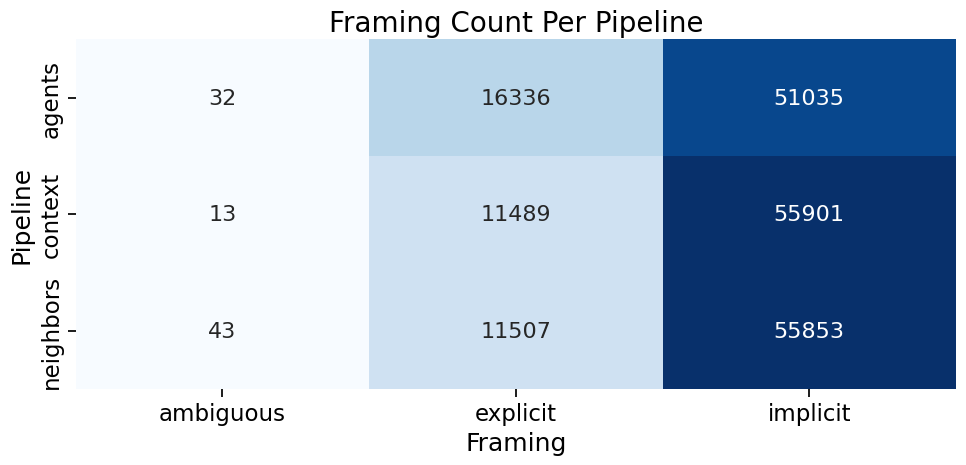

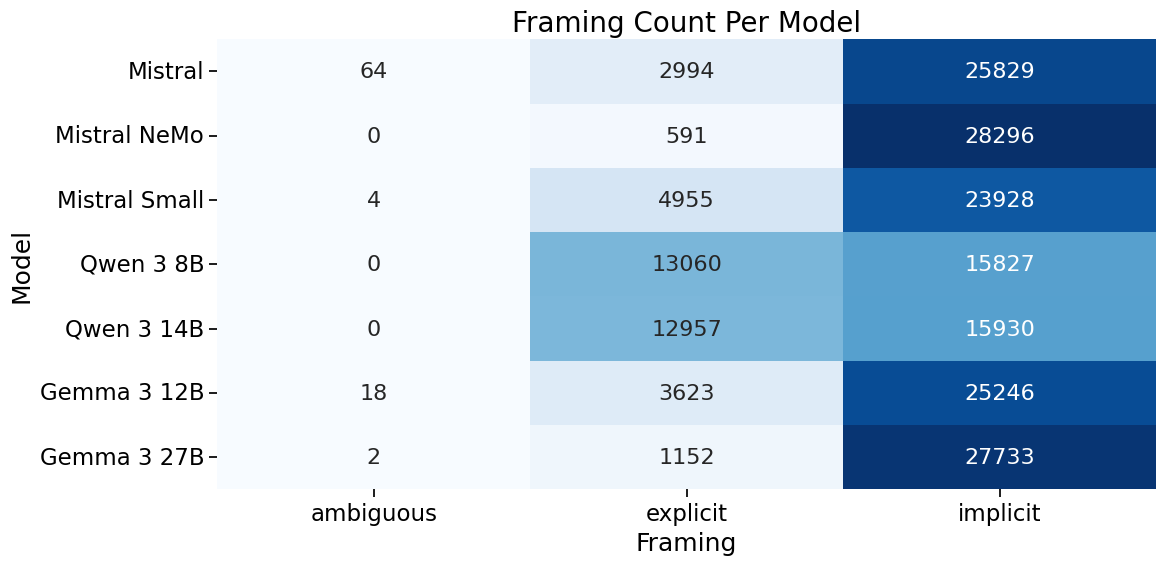

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook", font_scale=1.5)

def clean_framing_style(framing_style):
    return framing_style.strip().lower().replace("'", "").replace("`", "")

df = combined_framing.copy()

# Clean framing_style
df["framing_style"] = df["framing_style"].str.strip().str.capitalize()
df["framing_style"] = df["framing_style"].replace("Impicit", "implicit")
df["framing_style"] = df["framing_style"].apply(clean_framing_style)

# Group and count framing style per pipeline
heatmap_data_pipe = df.groupby(["pipe", "framing_style"]).size().unstack(fill_value=0)

# Plot 1: Pipeline
plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_data_pipe,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    annot_kws={'fontsize': 16}
)
plt.title("Framing Count Per Pipeline", fontsize=20)
plt.ylabel("Pipeline")
plt.xlabel("Framing")
plt.tight_layout()
plt.show()

# Group and count framing style per model
heatmap_data_model = df.groupby(["model_pretty", "framing_style"]).size().unstack(fill_value=0)

# Optional: enforce model order
model_order = [
    "Mistral", "Mistral NeMo", "Mistral Small",
    "Qwen 3 8B", "Qwen 3 14B", "Gemma 3 12B", "Gemma 3 27B"
]
heatmap_data_model = heatmap_data_model.reindex(model_order)

# Plot 2: Model
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data_model,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    annot_kws={'fontsize': 16}
)
plt.title("Framing Count Per Model", fontsize=20)
plt.ylabel("Model")
plt.xlabel("Framing")
plt.tight_layout()
plt.show()





In [19]:
import pandas as pd
import re

def clean_framing_tool(val):
    if pd.isna(val):
        return []

    val = str(val)

    # Remove brackets, quotes, and backticks
    val = re.sub(r"[\[\]\"\'\\`]", "", val)

    # Split on commas, semicolons, or multiple spaces
    tokens = re.split(r"[,\n\r;]+|\s{2,}", val)

    # Normalize and clean each token
    cleaned_tokens = [t.strip().lower() for t in tokens if t.strip()]
    return cleaned_tokens

def clean_framing_style(val):
    if pd.isna(val):
        return None
    
    # Convert to string, remove backticks and extra whitespace
    val = str(val).strip().replace("`", "").lower()

    # Capitalize first letter only
    return val.capitalize()

# Apply it to the dataframe
combined_framing['framing_style'] = combined_framing['framing_style'].apply(clean_framing_style)


# Apply cleaning function
combined_framing['framing_tool_clean'] = combined_framing['framing_tool'].apply(clean_framing_tool)
combined_framing['framing_style'] = combined_framing['framing_style'].str.replace("Impicit", "implicit")
combined_framing['framing_style'] = combined_framing['framing_style'].apply(clean_framing_style)


In [20]:
# Explode to make each framing_tool element its own row
exploded = combined_framing.explode('framing_tool_clean')
# Optional mapping for known variations
normalization_dict = {
    'sarcasm': 'sarcasm',
    'sarcastic': 'sarcasm',
    'ironic': 'irony',
    'irony': 'irony',
    'threat': 'threat',
    'metaphor': 'metaphor',
    'coded language': 'coded language',
    'code': 'coded language',
    'insinuation': 'insinuation',
    'dogwhistle': 'coded language',
    'mockery': 'sarcasm',
    'threats':'threat'
}

exploded['framing_tool_clean'] = exploded['framing_tool_clean'].map(
    lambda x: normalization_dict.get(x, x)  # map to known, or keep as-is
)


In [21]:
# Most frequent rhetorical tools
top_framing_tools = exploded['framing_tool_clean'].value_counts().head(20)
print(top_framing_tools)

print(len(exploded['framing_tool_clean'].unique()))


framing_tool_clean
sarcasm                 73081
coded language          62052
irony                   31734
metaphor                15956
insult                   1665
threat                   1475
generalization           1113
rhetorical question       660
stereotyping              651
loaded language           547
aggression                481
escalation                454
racism                    445
hate speech               416
hyperbole                 394
dehumanization            349
rhetorical questions      229
justification             206
historical analogy        201
threatening language      200
Name: count, dtype: int64
1242


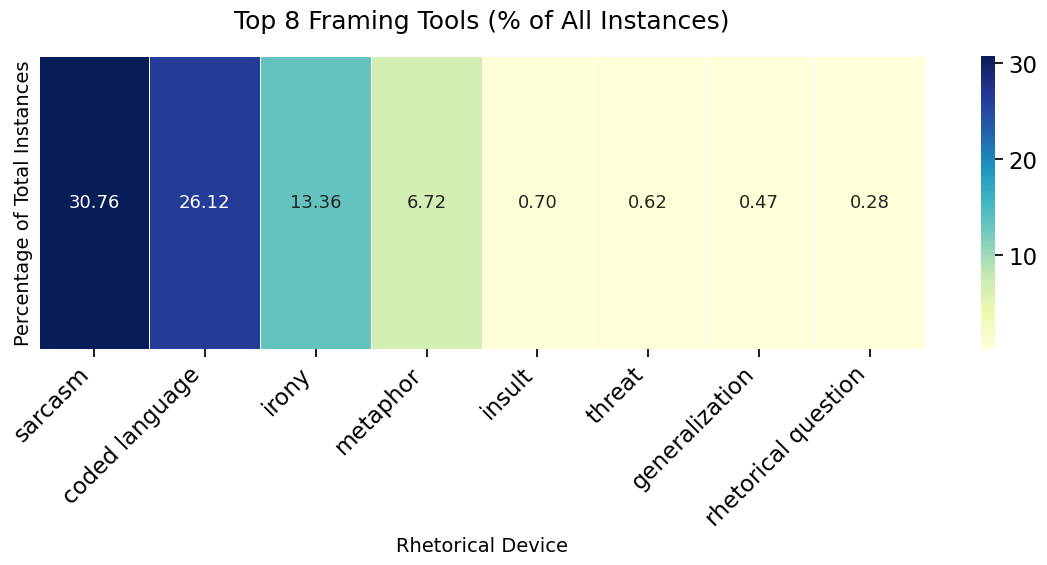

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top N most frequent framing tools
top_n = 8
top_tools_counts = exploded['framing_tool_clean'].value_counts().nlargest(top_n)

# Filter to top tools only
filtered = exploded[exploded['framing_tool_clean'].isin(top_tools_counts.index)]

# Normalize counts by total number of rows in exploded to get percentage
percentages = (
    filtered['framing_tool_clean']
    .value_counts()
    .reindex(top_tools_counts.index)
    .divide(len(exploded))  # Divide by total number of rows in the full dataset
    .multiply(100)
    .round(2)
    .to_frame(name='percentage')
    .T
)

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(
    percentages,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    cbar=True,
    linewidths=0.5,
    annot_kws={'fontsize': 13}
)

plt.title(f'Top {top_n} Framing Tools (% of All Instances)', pad=20)
plt.yticks([])  # Hide y-axis (single row)
plt.xlabel("Rhetorical Device", fontsize=14)
plt.ylabel("Percentage of Total Instances", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Elias\AppData\Local\Temp\ipykernel_19260\2140117043.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Model", bbox_to_anchor=(1.01, 1), loc="upper left")


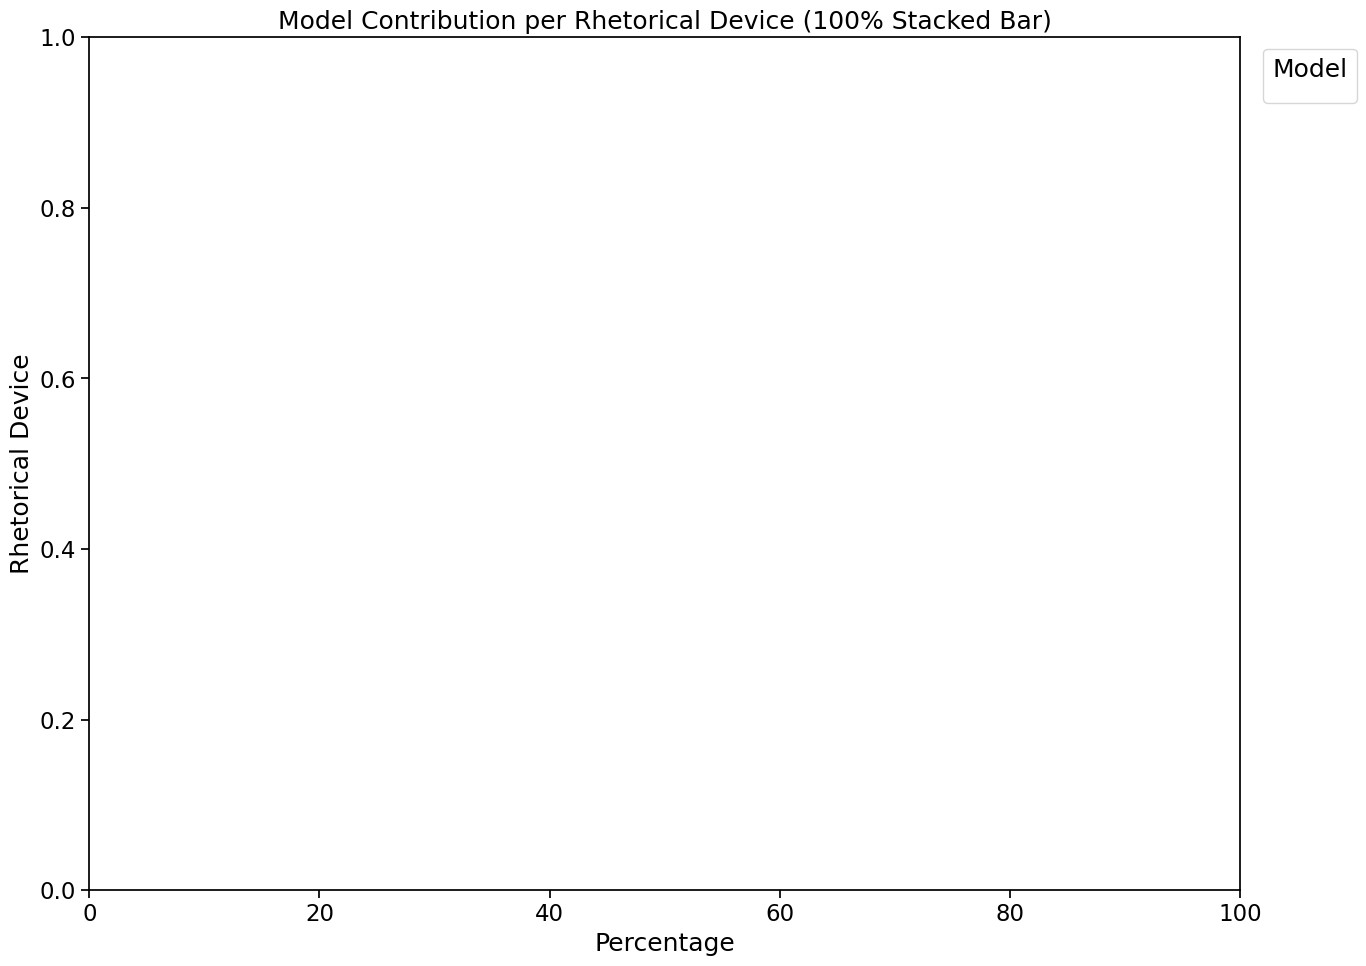

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get top 8 most frequent tools
top_8_tools = exploded['framing_tool_clean'].value_counts().nlargest(8).index

# Step 2: Filter exploded dataframe to only those tools
filtered_top = exploded[exploded['framing_tool_clean'].isin(top_8_tools)]

# Step 3: Group by framing tool and model (flip perspective)
tool_model_df = (
    filtered_top.groupby(['framing_tool_clean', 'model'])
    .size()
    .unstack(fill_value=0)
)

# Step 4: Convert to percentage (each row sums to 100%)
tool_model_percent = tool_model_df.div(tool_model_df.sum(axis=1), axis=0) * 100

# Step 5: Sort rows by total counts
tool_order = filtered_top['framing_tool_clean'].value_counts().loc[top_8_tools].index
tool_model_percent = tool_model_percent.loc[tool_order[::-1]]  # reverse the order


# Acronyms for models
model_acronyms = {
    "Mistral":"M",
    "Mistral NeMo":"MN",
    "Mistral Small":"MS",
    "Qwen 3 8B":"Q8",
    "Qwen 3 14B":"Q14",
    "Gemma 3 12B":"G12",
    "Gemma 3 27B": "G27"
}
# Use pastel colors
pastel_colors = sns.color_palette("pastel", n_colors=len(tool_model_percent.columns))

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
left = [0] * len(tool_model_percent)
# Force model column order
desired_model_order = [
    "Mistral", "Mistral NeMo", "Mistral Small",
    "Qwen 3 8B", "Qwen 3 14B", "Gemma 3 12B", "Gemma 3 27B"
]
# Reorder columns (drop any that aren't present just in case)
model_names = [m for m in desired_model_order if m in tool_model_df.columns]
tool_model_df = tool_model_df[model_names]

for i, model in enumerate(model_names):
    values = tool_model_percent[model]
    ax.barh(
        y=tool_model_percent.index,
        width=values,
        left=left,
        label=model_acronyms.get(model, model),
        color=pastel_colors[i % len(pastel_colors)],
        edgecolor='white'
    )

    # Add black text labels only if wide enough
    for j, (percent, lft) in enumerate(zip(values, left)):
        if percent > 5:
            ax.text(
                lft + percent / 2,
                j,
                f"{model_acronyms.get(model, model)}\n{percent:.0f}%",
                ha='center',
                va='center',
                color='Black',
                fontsize=14,
                fontweight='bold'
            )

    left = [x + y for x, y in zip(left, values)]

# Format
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage")
ax.set_ylabel("Rhetorical Device")
ax.set_title("Model Contribution per Rhetorical Device (100% Stacked Bar)")
ax.legend(title="Model", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()



In [24]:
# Original pretty name map
model_name_map = {
    "mistral": "mistral",
    "nemo": "mistral-nemo",
    "small": "mistral-small",
    "qwen_8b": "qwen3:8b",
    "qwen_14b": "qwen3:14b",
    "gemma_12b": "gemma3:12b",
    "gemma_27b": "gemma3:27b",
   
}
# Invert the map
inverse_model_map = {v: k for k, v in model_name_map.items()}

# Apply the inverse mapping
combined_framing["model"] = combined_framing["model"].map(inverse_model_map).fillna(combined_framing["model"])

tmp = combined_agents_only[
    ["document_id", "violence_label", "true_label", "pipe", "model", "content"]]



# Perform the merge
merged = combined_framing.merge(
    tmp[["document_id", "model", "pipe", 'true_label',"violence_label","content"]],
    on=["document_id", "model", "pipe"],
    how="left"
)


combined_framing_agents = merged.copy()
# Select only desired columns
combined_framing_agents = merged[["document_id", "violence_label", "framing_style", "framing_tool_clean", "true_label", "pipe","model","content"]]
print(combined_agents_only["true_label"].isna().mean())  # Should be near 0.0


print(combined_framing_agents.head())


0.0
  document_id  violence_label framing_style framing_tool_clean  true_label  \
0         1_1             1.0      Implicit          [sarcasm]         1.0   
1         1_2             0.0      Explicit                 []         0.0   
2         1_3             0.0      Explicit                 []         0.0   
3         1_4             1.0      Implicit           [threat]         1.0   
4         1_5             0.0      Implicit         [metaphor]         0.0   

     pipe    model                                            content  
0  agents  mistral  It's because Europeans do not want to change t...  
1  agents  mistral  ISLAM – A Simple, Humanitarian and Attractive ...  
2  agents  mistral  ISLAM has overtaken Roman Catholicism as the b...  
3  agents  mistral  All it means is there will be more of you to k...  
4  agents  mistral  People should know when they are conquered ......  


  framing_style  total_instances  accuracy  true_positives  false_positives  \
1      Explicit            39261  0.905784            4429             2529   
2      Implicit           162560  0.851975           15724            19007   
0     Ambiguous               88  0.977273               0                2   

   false_negatives  precision    recall  f1_score  
1             1170   0.636533  0.791034  0.705423  
2             5056   0.452737  0.756689  0.566518  
0                0   0.000000  0.000000  0.000000  


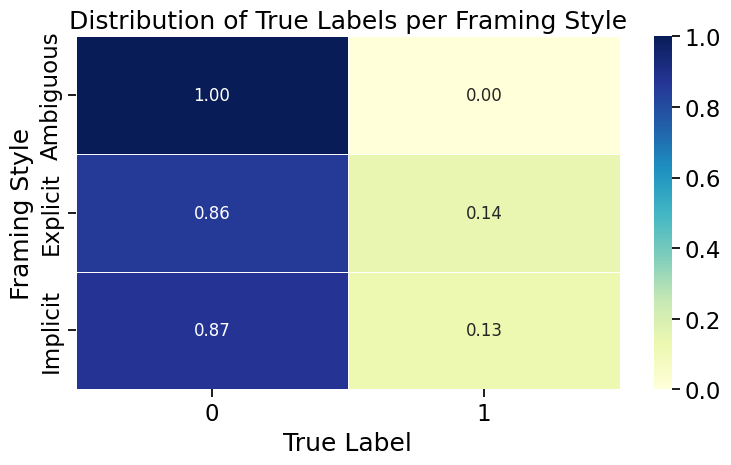

In [25]:
# Drop rows with missing labels
df = combined_framing_agents.dropna(subset=["true_label", "violence_label", "framing_style"]).copy()

# Ensure integer types
df["true_label"] = df["true_label"].astype(int)
df["violence_label"] = df["violence_label"].astype(int)

# Compute metrics per framing_style
style_performance = (
    df
    .groupby("framing_style")
    .agg(
        total_instances=("violence_label", "count"),
        accuracy=("violence_label", lambda x: (x == df.loc[x.index, "true_label"]).mean()),
        true_positives=("violence_label", lambda x: ((x == 1) & (df.loc[x.index, "true_label"] == 1)).sum()),
        false_positives=("violence_label", lambda x: ((x == 1) & (df.loc[x.index, "true_label"] == 0)).sum()),
        false_negatives=("violence_label", lambda x: ((x == 0) & (df.loc[x.index, "true_label"] == 1)).sum())
    )
    .reset_index()
)

# Precision, recall, F1
style_performance["precision"] = style_performance["true_positives"] / (
    style_performance["true_positives"] + style_performance["false_positives"]
)
style_performance["recall"] = style_performance["true_positives"] / (
    style_performance["true_positives"] + style_performance["false_negatives"]
)
style_performance["f1_score"] = 2 * (
    style_performance["precision"] * style_performance["recall"]
) / (
    style_performance["precision"] + style_performance["recall"]
)

# Clean
style_performance = style_performance.fillna(0)

# Display
print(style_performance.sort_values("f1_score", ascending=False))

# Cross-tabulation: count of each (framing_style, true_label) combination
cross_tab = pd.crosstab(df["framing_style"], df["true_label"])

# Normalize to get fraction of instances per framing_style
fraction_df = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    fraction_df,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=True,
    linewidths=0.5,
    annot_kws={"fontsize": 12}
)

plt.title("Distribution of True Labels per Framing Style")
plt.xlabel("True Label")
plt.ylabel("Framing Style")
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

df = combined_framing_agents.copy()

# Drop rows with missing document_id or essential fields
df = df.dropna(subset=["document_id", "model", "pipe"]).copy()
df["document_id"] = df["document_id"].astype(str)

# Calculate per-combination sample target
all_combos = df.groupby(["model", "pipe"]).size().reset_index()[["model", "pipe"]]
num_combos = len(all_combos)
samples_per_combo = 100 // num_combos
leftover = 100 % num_combos

# Initialize
used_ids = set()
final_rows = []

# Loop over combinations
for i, row in all_combos.iterrows():
    model, pipe = row["model"], row["pipe"]
    n = samples_per_combo + (1 if i < leftover else 0)

    # Filter to available candidates
    combo_df = df[(df["model"] == model) & (df["pipe"] == pipe)]
    combo_df = combo_df[~combo_df["document_id"].isin(used_ids)]

    # Drop duplicates per document_id to avoid internal duplication
    combo_df = combo_df.drop_duplicates(subset=["document_id"])

    if len(combo_df) < n:
        raise ValueError(f"Not enough unique document_ids in ({model}, {pipe}). Needed: {n}, Available: {len(combo_df)}")

    sampled = combo_df.sample(n=n, random_state=42)
    used_ids.update(sampled["document_id"])
    final_rows.append(sampled)

# Combine final sample
final_sample = pd.concat(final_rows, ignore_index=True)

# Final sanity check
assert final_sample["document_id"].is_unique, "Duplicate document_ids found!"

# Save to file
final_sample.to_csv("combined_framing_agents_FOR_QUALITATIVE_ANALYSIS.csv", index=False)

print("✅ Sample created with 100 unique document_ids and balanced model-pipeline representation.")


✅ Sample created with 100 unique document_ids and balanced model-pipeline representation.


In [27]:


import ast
import pandas as pd
from pathlib import Path


################################################################################
# Parameters – change these two lines if your file/column names differ
################################################################################
DATA_PATH     = Path("framing_q_analysis.csv")        # <-- your CSV file
AGREE_COLUMN  = "agreemement"                         # note the double “e”
################################################################################


# Human-readable reason labels lifted from your rules screenshot
REASON_LABELS = {
    0: "helt enig",                                            # completely agree
    1: "Burde ikke vært implicit – forced framing_tool",       # implicit → explicit mismatch
    2: "Burde ikke være explicit",                             # explicit ↔ implicit mismatch
    3: "Riktig framing, men feil tool",                        # right style, wrong tool
}


def load_dataframe(path: Path) -> pd.DataFrame:
    """Read CSV and coerce the framing_tool_clean column to a real Python list."""
    df = pd.read_csv(path)

    # If framing_tool_clean is a string like "['sarcasm', 'irony']" convert to list
    if df["framing_tool_clean"].dtype == object:
        df["framing_tool_clean"] = df["framing_tool_clean"].apply(
            lambda x: ast.literal_eval(x) if isinstance(x, str) else x
        )

    return df


def overall_agreement(df: pd.DataFrame) -> pd.Series:
    """Overall agreement counts & rate."""
    total = len(df)
    agree = df[AGREE_COLUMN].sum()
    disagree = total - agree
    return pd.Series(
        {
            "total_rows": total,
            "agree": int(agree),
            "disagree": int(disagree),
            "agreement_rate": agree / total,
        }
    )


def agreement_by_style(df: pd.DataFrame) -> pd.DataFrame:
    """Agreement broken down by Implicit / Explicit style predicted by the model."""
    g = df.groupby("framing_style")[AGREE_COLUMN].agg(["count", "sum"])
    g = g.rename(columns={"count": "total", "sum": "agree"})
    g["disagree"] = g["total"] - g["agree"]
    g["agreement_rate"] = g["agree"] / g["total"]
    return g.sort_index()


def agreement_by_tool(df: pd.DataFrame) -> pd.DataFrame:
    """Agreement for every individual framing tool (explodes the list column)."""
    # One row per tool
    exploded = df.explode("framing_tool_clean")

    g = exploded.groupby(["framing_tool_clean", AGREE_COLUMN]).size().unstack(fill_value=0)
    # The column 1 is “agree”, 0 is “disagree”.  Guard for missing columns.
    g["agree"]    = g.get(1, 0)
    g["disagree"] = g.get(0, 0)
    g["total"]    = g["agree"] + g["disagree"]
    g["agreement_rate"] = g["agree"] / g["total"]
    return g.sort_values("total", ascending=False)


def reason_distribution(df: pd.DataFrame) -> pd.DataFrame:
    """How often each reason code appears."""
    counts = df["reason"].value_counts().rename("count").to_frame()
    counts["label"] = counts.index.map(REASON_LABELS)
    counts["percent_of_all_rows"] = counts["count"] / len(df)
    return counts.sort_index()


def main() -> None:
    df = load_dataframe(DATA_PATH)

    print("# ============================================================ #")
    print("# Framing-QA quick report")
    print("# ============================================================ #\n")

    print("Overall agreement:")
    print(overall_agreement(df).to_string(), end="\n\n")

    print("Agreement by framing style (Implicit / Explicit):")
    print(agreement_by_style(df).to_string(), end="\n\n")

    print("Agreement by framing tool (top 20):")
    print(agreement_by_tool(df).head(20).to_string(), end="\n\n")

    print("Reason code distribution:")
    print(reason_distribution(df).to_string(), end="\n\n")


if __name__ == "__main__":
    main()



# ============================================================ #
# Framing-QA quick report
# ============================================================ #

Overall agreement:
total_rows        100.00
agree              55.00
disagree           45.00
agreement_rate      0.55

Agreement by framing style (Implicit / Explicit):
               total  agree  disagree  agreement_rate
framing_style                                        
Explicit          20     19         1            0.95
Implicit          80     36        44            0.45

Agreement by framing tool (top 20):
agreemement          0   1  agree  disagree  total  agreement_rate
framing_tool_clean                                                
sarcasm             25  18     18        25     43        0.418605
coded language      11  14     14        11     25        0.560000
irony                9   5      5         9     14        0.357143
metaphor             2   4      4         2      6        0.666667
dehumanization    